# Priest VS Maiden

Datakilde: Spotify

En undersøkende datalek av hvordan Spotify-algoritmene ser på to av verdens beste band.

In [1]:
import json
import time
import sys

import pandas as pd
import requests

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

In [3]:
def get_artist(name):
    results = spotify.search(q='artist:' + name, type='artist')
    items = results['artists']['items']
    if len(items) > 0:
        return items[0]
    else:
        return None


def show_album_tracks(album):
    tracks = []
    results = spotify.album_tracks(album['id'])
    tracks.extend(results['items'])
    while results['next']:
        results = spotify.next(results)
        tracks.extend(results['items'])
    for i, track in enumerate(tracks):
        print( i+1, track['name'])
    print(tracks.columns)


def show_artist_albums(artist):
    albums = []
    results = spotify.artist_albums(artist['id'], album_type='album')
    albums.extend(results['items'])
    while results['next']:
        results = spotify.next(results)
        albums.extend(results['items'])
    print('Total albums: %s', len(albums))
    unique = set()  # skip duplicate albums
    for album in albums:
        name = album['name'].lower()
        if name not in unique:
            print('ALBUM:', name)
            unique.add(name)
            show_album_tracks(album)


def show_artist(artist):
    print('====', artist['name'], '====')
    print('Popularity:', artist['popularity'])
    print('Followers:', artist['followers']["total"])
    if len(artist['genres']) > 0:
        print('Genres:', ','.join(artist['genres']))




In [4]:
def is_live(x):
    if "Live" in x["name"]:
        return True

    # Maiden checks
    if "Maiden England" in x["name"]:
        return True
    if "En Vivo" in x["name"]:
        return True
    if "Death on the Road" in x["name"]:
        return True
    if "Flight 666" in x["name"]:
        return True
    
    # Priest checks
    if "50 Heavy Metal Years" in x["name"]:
        return True
    if "Redeemer of Souls (Track by Track)" in x["name"]:
        return True
    if "Battle Cry" in x["name"]:
        return True
    if "Living After Midnight" in x["name"]:
        return True
    if "Turbo 30 (Remastered 30th Anniversary Deluxe" in x["name"]:
        return True
    if "Screaming For Vengeance (Expanded Edition)" in x["name"]:
        return True
    if "Defenders of the Faith (30th Anniversary Editi" in x["name"]:
        return True
    
    return False

In [5]:
def is_bonus_track(name):
    if "- Live" in name:
        return True
    
    if "Bonus Track" in name:
        return True
    
    return False

In [6]:
def normalize_name(name):
    name = name.replace("(Remastered)", "")
    name = name.replace("30th Anniversary Edition)", "")
    name = name.replace("(Deluxe)", "")
    name = name.replace("(2015 Remaster)", "")
    name = name.replace("(2013 Remaster)", "")
    name = name.replace("(1998 Remaster)", "")
    
    name = name.replace("- Remastered", "")
    name = name.replace("- 2015 Remaster", "")
    name = name.replace("- 2013 Remaster", "")
    name = name.replace("- 1998 Remaster", "")
    
    name = name.strip()

    return name

# Maiden

In [7]:
maiden = get_artist("Iron Maiden")
show_artist(maiden)

==== Iron Maiden ====
Popularity: 76
Followers: 6915603
Genres: hard rock,metal,nwobhm,rock


In [8]:
maiden_related_artists = spotify.artist_related_artists(maiden["id"])
for maiden_related_artist in maiden_related_artists["artists"]:
    print(maiden_related_artist["name"])

Judas Priest
Dio
Accept
Motörhead
Saxon
Manowar
Black Sabbath
Bruce Dickinson
Megadeth
W.A.S.P.
Helloween
Rainbow
King Diamond
Ozzy Osbourne
Testament
Iced Earth
Black Label Society
Blind Guardian
Twisted Sister
Anthrax


In [9]:
# Maiden albums
maiden_albums = []
results = spotify.artist_albums(maiden['id'], album_type='album')
maiden_albums.extend(results['items'])
while results['next']:
    results = spotify.next(results)
    maiden_albums.extend(results['items'])

In [10]:
maiden_album_dicts = []
for maiden_album in maiden_albums:
    if "NO" in maiden_album["available_markets"]:
        maiden_album_dicts.append({
            "id": maiden_album["id"],
            "name": maiden_album["name"],
            "release_date": maiden_album["release_date"],
            "image": maiden_album["images"][0]["url"]
        })
maiden_album_df = pd.DataFrame.from_dict(maiden_album_dicts)

In [11]:
maiden_album_df["live"] = maiden_album_df.apply(lambda x:is_live(x),axis=1)

In [12]:
maiden_album_df.head()

,id,name,release_date,image,live
0,3TymcPWXqsCRA5oSL0TkPU,Senjutsu,2021-09-03,https://i.scdn.co/image/ab67616d0000b2739dded0...,False
1,6IVkf5av5jnraZpLPszoZR,"Nights of the Dead, Legacy of the Beast: Live ...",2020-11-20,https://i.scdn.co/image/ab67616d0000b2733dd751...,True
2,3oFAX7PeOFbZnKiPmpUPv4,The Book of Souls: Live Chapter,2017-11-17,https://i.scdn.co/image/ab67616d0000b273f83165...,True
3,4vSfHrq6XxVyMcJ6PguFR2,The Book of Souls,2015-09-04,https://i.scdn.co/image/ab67616d0000b273443bd0...,False
4,44myoe2TKVeLrIhfcN7xVK,Maiden England '88 (2013 Remaster),2013-03-25,https://i.scdn.co/image/ab67616d0000b2738149b7...,True


# Priest

In [13]:
priest = get_artist("Judas Priest")
show_artist(priest)

==== Judas Priest ====
Popularity: 68
Followers: 2922032
Genres: album rock,birmingham metal,classic rock,hard rock,metal,power metal,rock


In [14]:
priest_related_artists = spotify.artist_related_artists(priest["id"])
for priest_related_artist in priest_related_artists["artists"]:
    print(priest_related_artist["name"])

Dio
Saxon
Accept
Halford
Heaven & Hell
Iron Maiden
Motörhead
King Diamond
W.A.S.P.
Bruce Dickinson
Rainbow
Manowar
Diamond Head
Black Sabbath
U.D.O.
Megadeth
Overkill
Savatage
Mercyful Fate
Running Wild


In [15]:
# Priest albums
priest_albums = []
results = spotify.artist_albums(priest['id'], album_type='album')
priest_albums.extend(results['items'])
while results['next']:
    results = spotify.next(results)
    priest_albums.extend(results['items'])

In [16]:
priest_album_dicts = []
for priest_album in priest_albums:
    if "NO" in priest_album["available_markets"]:
        priest_album_dicts.append({
            "id": priest_album["id"],
            "name": priest_album["name"],
            "release_date": priest_album["release_date"],
            "image": priest_album["images"][0]["url"]
        })
priest_album_df = pd.DataFrame.from_dict(priest_album_dicts)

In [17]:
priest_album_df["live"] = priest_album_df.apply(lambda x:is_live(x),axis=1)

In [18]:
priest_album_df.head()

,id,name,release_date,image,live
0,2alySadx70cVPH0YC9QHFM,Reflections - 50 Heavy Metal Years of Music,2021-10-15,https://i.scdn.co/image/ab67616d0000b273bb19ba...,True
1,7p3G0OCxtlWyJcPE1FxnyB,Firepower,2018-03-09,https://i.scdn.co/image/ab67616d0000b2735c48f1...,False
2,6fJqp1I3UMz2DzCGSJpmrS,Turbo 30 (Remastered 30th Anniversary Deluxe E...,2017-02-03,https://i.scdn.co/image/ab67616d0000b273f58b75...,True
3,09OABBoUoHmbi3IyFLplTy,Battle Cry,2016-03-25,https://i.scdn.co/image/ab67616d0000b273850e0e...,True
4,1A7ghngoYLVNBKJ4QRJMhx,Redeemer of Souls (Track by Track),2014-07-08,https://i.scdn.co/image/ab67616d0000b273cc2fa2...,True


In [76]:
# Opening JSON file
f = open('data/priestmaiden-playcount.json',)
 
# returns JSON object as
# a dictionary
playcount = json.load(f)

In [20]:
all_the_tracks = []
for index, album in enumerate(playcount["priest"]):
    for track in album["data"]["album"]["tracks"]["items"]:
        track = {
            "artist": "Judas Priest",
            "followers": priest['followers']["total"],
            "album": normalize_name(priest_album_df['name'][index]),
            "album_id": priest_album_df['id'][index],
            "release_date": priest_album_df['release_date'][index],
            "live_special":  priest_album_df['live'][index],
            "image":  priest_album_df['image'][index],
            "uid": track["uid"],
            "id": track["track"]["uri"].replace("spotify:track:", ""),
            "tracknumber": track["track"]["trackNumber"],
            "name": normalize_name(track["track"]["name"]),
            "playcount": track["track"]["playcount"],
            "duration": track["track"]["duration"]["totalMilliseconds"],
            "bonustrack": is_bonus_track(track["track"]["name"])
        }
        all_the_tracks.append(track)

In [21]:
for index, album in enumerate(playcount["maiden"]):
    for track in album["data"]["album"]["tracks"]["items"]:
        track = {
            "artist": "Iron Maiden",
            "followers": maiden['followers']["total"],
            "album": normalize_name(maiden_album_df['name'][index]),
            "album_id": maiden_album_df['id'][index],
            "release_date": maiden_album_df['release_date'][index],
            "live_special":  maiden_album_df['live'][index],
            "image":  maiden_album_df['image'][index],
            "uid": track["uid"],
            "id": track["track"]["uri"].replace("spotify:track:", ""),
            "tracknumber": track["track"]["trackNumber"],
            "name": normalize_name(track["track"]["name"]),
            "playcount": track["track"]["playcount"],
            "duration": track["track"]["duration"]["totalMilliseconds"],
            "bonustrack": is_bonus_track(track["track"]["name"])
        }
        all_the_tracks.append(track)

In [22]:
df = pd.DataFrame.from_dict(all_the_tracks)

In [23]:
df["playcount"] = pd.to_numeric(df["playcount"])

In [25]:
df.sort_values("playcount", ascending=False).tail(10)

,artist,followers,album,album_id,release_date,live_special,image,uid,id,tracknumber,name,playcount,duration,bonustrack
556,Iron Maiden,6915603,Beast Over Hammersmith (Live),1U3qu4gDfohAqFrmpLT11l,2002-11-18,True,https://i.scdn.co/image/ab67616d0000b2731136d2...,21f094ddcc9d3243b12f,7o86uXQwwe45ZHBT8XaD5M,14,"Iron Maiden - Live: Reading Festival, 28 Augus...",5096,297586,True
560,Iron Maiden,6915603,Beast Over Hammersmith (Live),1U3qu4gDfohAqFrmpLT11l,2002-11-18,True,https://i.scdn.co/image/ab67616d0000b2731136d2...,163beab83eb217381264,0cdefmCErFg9vz0J0JxLN2,4,"Running Free - Live: Reading Festival, 23 Augu...",4914,232560,True
568,Iron Maiden,6915603,Beast Over Hammersmith (Live),1U3qu4gDfohAqFrmpLT11l,2002-11-18,True,https://i.scdn.co/image/ab67616d0000b2731136d2...,e74b279a1919d2e5c5cd,1ks2OkyYe5Q0GaM1fhInM0,12,The Number Of The Beast - Live: Monsters of Ro...,4737,282546,True
561,Iron Maiden,6915603,Beast Over Hammersmith (Live),1U3qu4gDfohAqFrmpLT11l,2002-11-18,True,https://i.scdn.co/image/ab67616d0000b2731136d2...,d91e5274a7334e63d8e3,38vcEqnt9UtJjQIuDDSoRq,5,"Transylvania - Live: Reading Festival, 23 Augu...",4451,288946,True
562,Iron Maiden,6915603,Beast Over Hammersmith (Live),1U3qu4gDfohAqFrmpLT11l,2002-11-18,True,https://i.scdn.co/image/ab67616d0000b2731136d2...,7c21fd78ed468260757d,4Z8ATOQLZMs4tgShusimgL,6,"Iron Maiden - Live: Reading Festival, 23 Augus...",4048,296080,True
570,Iron Maiden,6915603,Beast Over Hammersmith (Live),1U3qu4gDfohAqFrmpLT11l,2002-11-18,True,https://i.scdn.co/image/ab67616d0000b2731136d2...,cec1d5cfca8195f2fd8a,0Y08rxWp58RDjhSy5GjJPp,14,"Iron Maiden - Live: Monsters of Rock festival,...",4012,361106,True
88,Judas Priest,2922032,Redeemer of Souls (Track by Track),1A7ghngoYLVNBKJ4QRJMhx,2014-07-08,True,https://i.scdn.co/image/ab67616d0000b273cc2fa2...,2b23674db4394a2a01f9,0sWujCjwwHMwa44cBKsWUR,15,Tears of Blood - Commentary,1147,24440,False
90,Judas Priest,2922032,Redeemer of Souls (Track by Track),1A7ghngoYLVNBKJ4QRJMhx,2014-07-08,True,https://i.scdn.co/image/ab67616d0000b273cc2fa2...,63a365110dec9efe3246,4krmGDWytK75Vr3P4xEvGl,17,Bring It On - Commentary,0,19600,False
84,Judas Priest,2922032,Redeemer of Souls (Track by Track),1A7ghngoYLVNBKJ4QRJMhx,2014-07-08,True,https://i.scdn.co/image/ab67616d0000b273cc2fa2...,baca8b468890c3bf2f43,29DWWO0xVk62Q0jBYrEPUs,11,Secrets of the Dead - Commentary,0,20773,False
85,Judas Priest,2922032,Redeemer of Souls (Track by Track),1A7ghngoYLVNBKJ4QRJMhx,2014-07-08,True,https://i.scdn.co/image/ab67616d0000b273cc2fa2...,b7589f2bed269b5cc028,7h3M40cdbVZmiq4PLF5QfJ,12,Battle Cry - Commentary,0,19813,False


In [26]:
df_non_live = df[df["live_special"] == False]

In [27]:
df_non_live = df_non_live[df_non_live.bonustrack == False]

In [28]:
df_non_live["playcount_weighted"] = df_non_live["playcount"] / df_non_live["followers"]

In [29]:
df_non_live.sort_values("playcount_weighted", ascending=False).head(10)

,artist,followers,album,album_id,release_date,live_special,image,uid,id,tracknumber,name,playcount,duration,bonustrack,playcount_weighted
297,Judas Priest,2922032,British Steel,5bqtZRbUZUxUps8mrO9tGY,1980,False,https://i.scdn.co/image/ab67616d0000b273be0e5e...,c781130d7a7660ab219e,2RaA6kIcvomt77qlIgGhCT,3,Breaking the Law,151536197,153840,False,51.859869
730,Iron Maiden,6915603,Piece of Mind,7I9Wh2IgvI3Nnr8Z1ZSWby,1983,False,https://i.scdn.co/image/ab67616d0000b2732277d1...,65788c2d7bc1fd8654ce,4OROzZUy6gOWN4UGQVaZMF,5,The Trooper,230801434,252733,False,33.374014
740,Iron Maiden,6915603,The Number of the Beast,5S3gls8Kjn8KVmqlIDEBbO,1982,False,https://i.scdn.co/image/ab67616d0000b2735c29a8...,a14ec9ebd9de73ab0853,4Zc7TCHzuNwL0AFBlyLdyr,6,Run to the Hills,226772517,233506,False,32.791431
673,Iron Maiden,6915603,Fear of the Dark,16Su3EUFLPqWVyrwN1q5wO,1992,False,https://i.scdn.co/image/ab67616d0000b2730dda9c...,2621a8d894717aeed5e7,6p8eFfPw3nQkf37aT3AkmK,12,Fear of the Dark,202379714,438120,False,29.264218
161,Judas Priest,2922032,Painkiller,7LgrhuKnAXpNEv8qzcVd2t,1990-09-26,False,https://i.scdn.co/image/ab67616d0000b27360db4c...,b9f30b087ee661e73eef,0L7zm6afBEtrNKo6C6Gj08,1,Painkiller,78541829,365826,False,26.879182
262,Judas Priest,2922032,Screaming For Vengeance,0V7mTTzioHiYIjfM8ATZBI,1982,False,https://i.scdn.co/image/ab67616d0000b273a79a10...,c59ad3b36c95d376bed9,4f3RDq9nYPBeR1yMSgnmBm,8,You've Got Another Thing Coming,76034389,310080,False,26.021067
301,Judas Priest,2922032,British Steel,5bqtZRbUZUxUps8mrO9tGY,1980,False,https://i.scdn.co/image/ab67616d0000b273be0e5e...,5c4b712164ef391e7766,0IXpUl1fn2QZcBavfuq0H4,7,Living After Midnight,70286611,210133,False,24.054018
739,Iron Maiden,6915603,The Number of the Beast,5S3gls8Kjn8KVmqlIDEBbO,1982,False,https://i.scdn.co/image/ab67616d0000b2735c29a8...,8f39ee2aca3df48fd967,3nlGByvetDcS1uomAoiBmy,5,The Number of the Beast,151269100,290586,False,21.873595
742,Iron Maiden,6915603,The Number of the Beast,5S3gls8Kjn8KVmqlIDEBbO,1982,False,https://i.scdn.co/image/ab67616d0000b2735c29a8...,9f55007f6f37eeef1359,469rBLYJUZHMJLtq2Wch3h,8,Hallowed Be Thy Name,102750462,431093,False,14.857773
256,Judas Priest,2922032,Screaming For Vengeance,0V7mTTzioHiYIjfM8ATZBI,1982,False,https://i.scdn.co/image/ab67616d0000b273a79a10...,3180c0ee52efa9c3742a,3w9zHVKI28aUPZTxq8oDC6,2,Electric Eye,42854344,222440,False,14.665939


* Hent artister
* Hent relaterte artister
* Hent album
* Merk liveplater
* Hent spor
* For 100 og 100 hent audio_features (filtrer ut liveplater)
* Importer playcount
* Finn totalen følgere for hver artist
* Bergegn ting
* Gjør evaluering

In [30]:
audio_feat_0_100 = spotify.audio_features(df_non_live.id.to_list()[:100])

In [31]:
audio_feat_101_200 = spotify.audio_features(df_non_live.id.to_list()[101:200])

In [32]:
audio_feat_201_300 = spotify.audio_features(df_non_live.id.to_list()[201:300])

In [33]:
audio_feat_301 = spotify.audio_features(df_non_live.id.to_list()[301:])

In [34]:
audio_featues = []
audio_featues.extend(audio_feat_0_100)
audio_featues.extend(audio_feat_101_200)
audio_featues.extend(audio_feat_201_300)
audio_featues.extend(audio_feat_301)

In [35]:
df_audio_features = pd.DataFrame.from_dict(audio_featues)

In [36]:
df_analyse = pd.merge(df_non_live, df_audio_features, on="id")

In [37]:
df_analyse["release_date"] = df_analyse["release_date"].str[0:4].astype(int)

In [38]:
df_analyse = df_analyse.sort_values('release_date', ascending=True)

In [39]:
priest_album_order = df_analyse[df_analyse.artist == "Judas Priest"].album.unique().tolist()
maiden_album_order = df_analyse[df_analyse.artist == "Iron Maiden"].album.unique().tolist()

In [40]:
df_analyse.loc[df_analyse.artist == "Judas Priest", "album_number"] = df_analyse[df_analyse.artist == "Judas Priest"].album.apply(lambda x: priest_album_order.index(x) + 1)
df_analyse.loc[df_analyse.artist == "Iron Maiden", "album_number"] = df_analyse[df_analyse.artist == "Iron Maiden"].album.apply(lambda x: maiden_album_order.index(x) + 1)

In [41]:
df_analyse.to_csv("data/data.csv", decimal=",", sep=";")

In [42]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [43]:
df_analyse.groupby(["artist", "album"])["playcount"].agg([sum, 'mean', 'median', 'count', 'min', 'max']).to_csv("data/album_by_album.csv", sep=";",  decimal=",")

In [44]:
df_analyse.sort_values("valence", ascending=False).head(20)[["artist", "album", "name", "valence"]]

,artist,album,name,valence
132,Judas Priest,British Steel,Living After Midnight,0.82
89,Judas Priest,Turbo 30,Parental Guidance,0.81
177,Judas Priest,Rocka Rolla,Rocka Rolla,0.80
329,Iron Maiden,Killers,Wrathchild,0.78
160,Judas Priest,Sin After Sin,Starbreaker,0.77
340,Iron Maiden,Iron Maiden,Running Free,0.76
8,Judas Priest,Firepower,Flame Thrower,0.76
123,Judas Priest,Point Of Entry,Troubleshooter,0.76
276,Iron Maiden,Fear of the Dark,Weekend Warrior,0.76
303,Iron Maiden,Powerslave,Aces High,0.76


In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import mpld3
mpld3.disable_notebook()

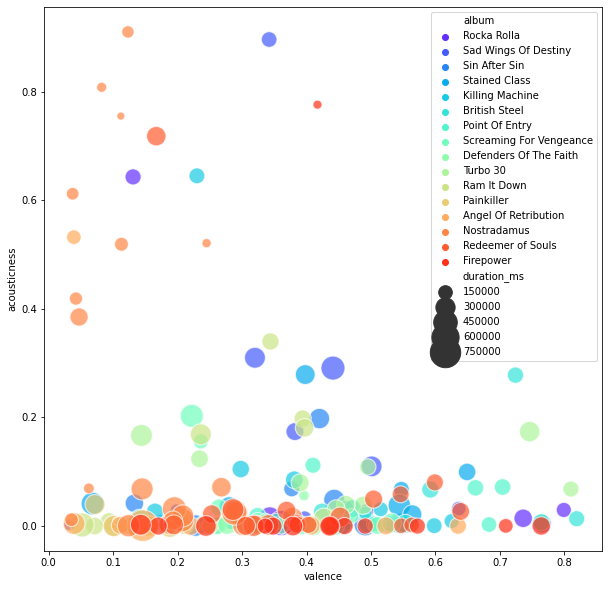

In [48]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(data=df_analyse[df_analyse.artist == "Judas Priest"], x='valence', y='acousticness', 
                     hue='album', palette='rainbow', 
                     size='duration_ms', sizes=(50,1000), 
                     alpha=0.7)

# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h, labs, loc='best', title=None)

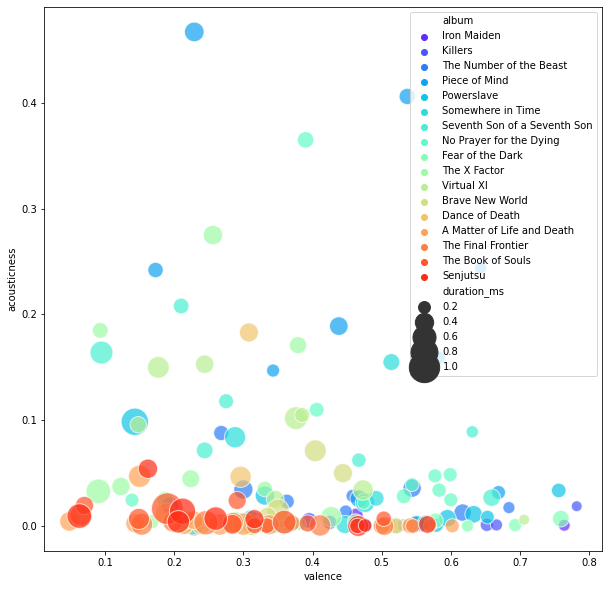

In [49]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(data=df_analyse[df_analyse.artist == "Iron Maiden"], x='valence', y='acousticness', 
                     hue='album', palette='rainbow', 
                     size='duration_ms', sizes=(50,1000), 
                     alpha=0.7)

# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h, labs, loc='best', title=None)

In [50]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


# extract relevant columns to numpy array
X = (df_analyse
 .filter(['acousticness', 'danceability', 'playcount', 'energy',
          'instrumentalness', 'liveness', 'loudness', 'tempo', 'valence'])
)

# algo will do better if data is standardized (zero mean, unit variance)
Xs = StandardScaler().fit_transform(X)

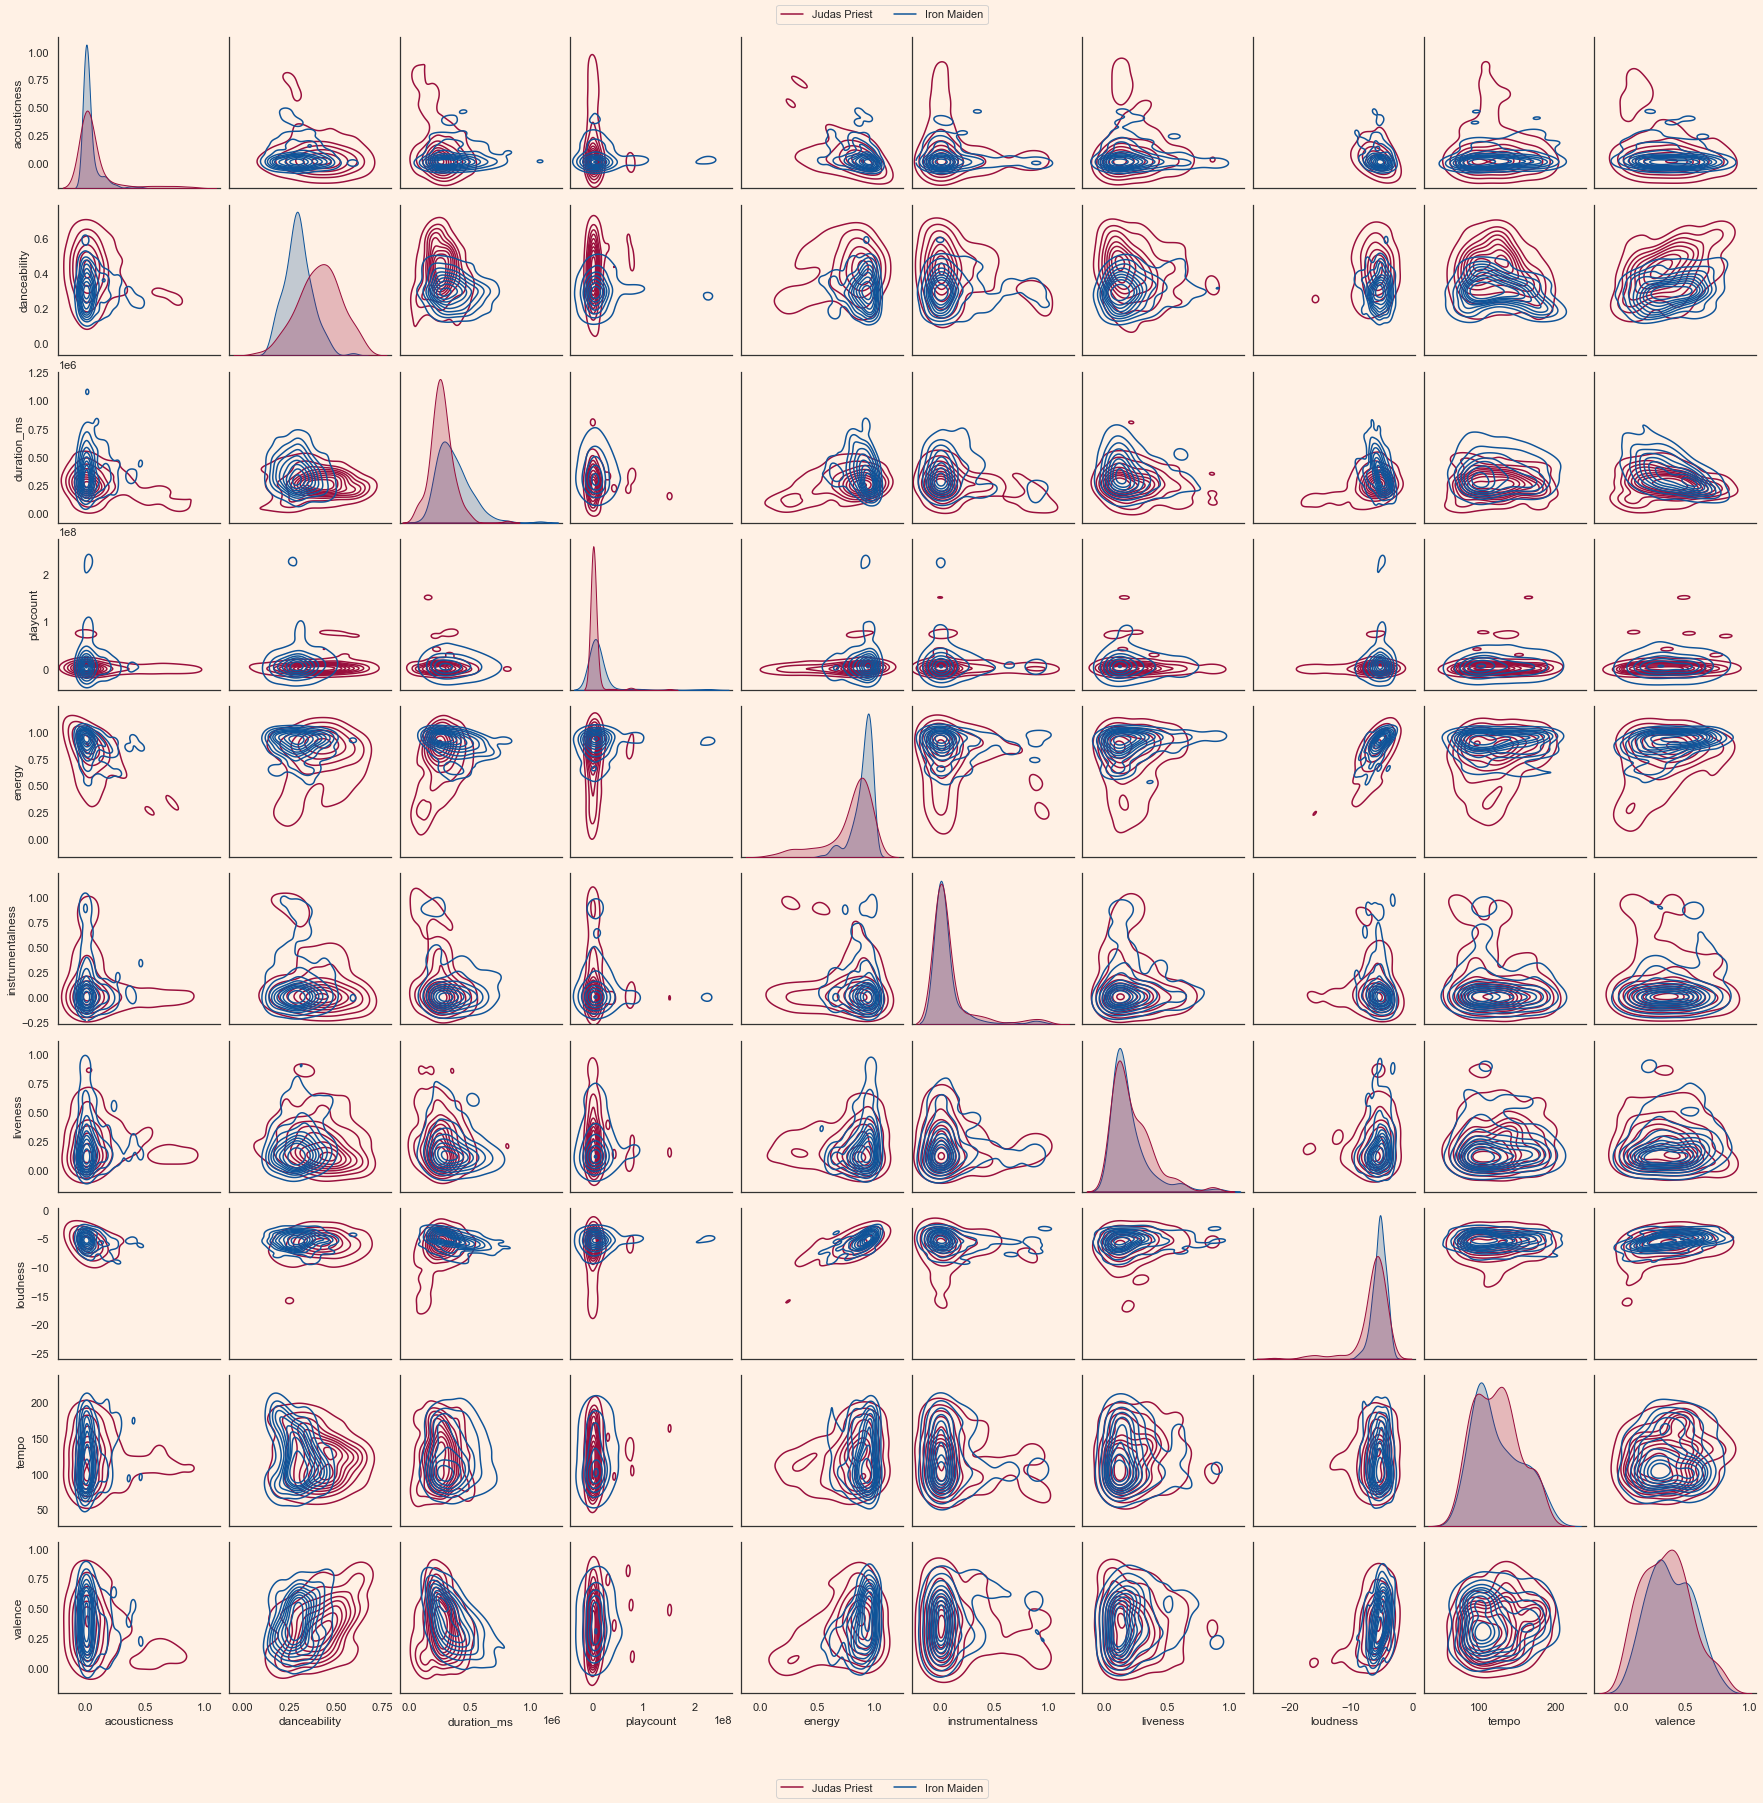

In [73]:
sns.set(rc={'axes.facecolor':'#fff1e5', 'figure.facecolor':'#fff1e5', 'axes.edgecolor': '#333333', 'grid.color': '#333333', 'axes.grid': False})
fig = sns.pairplot(df_analyse
 .filter(['acousticness', 'danceability', 'duration_ms', 'playcount', 'energy',
          'instrumentalness', 'liveness', 'loudness', 'tempo', 'valence', 'artist']), hue="artist",  kind="kde", palette={"Judas Priest": "#990f3d", "Iron Maiden": "#0f5499"})

handles = fig._legend_data.values()
labels = fig._legend_data.keys()
fig._legend.remove()
fig.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=2)
fig.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=2)
fig.fig.subplots_adjust(top=0.98, bottom=0.06)

In [74]:
fig.savefig('output/pairplot.svg')
fig.savefig('output/pairplot.pdf')

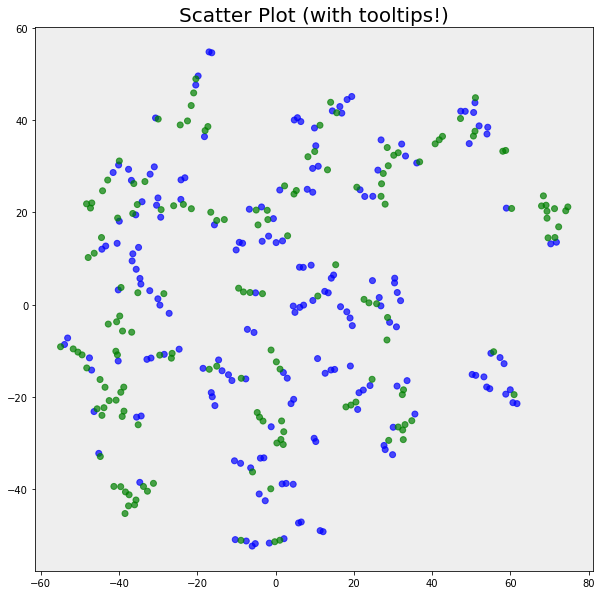

In [400]:
mpld3.enable_notebook()
# construct 2-d embedding
tsne = TSNE(n_components=2, perplexity=5, 
    early_exaggeration=2, random_state=3).fit_transform(Xs)

# convert to dataframe for plotting purposes
tsne = pd.DataFrame(tsne)
tsne['album'] = df_analyse['album']
tsne['song'] = df_analyse['name']
tsne['artist'] = df_analyse['artist']
tsne['color'] = df_analyse.artist.apply(lambda x: "blue" if x == "Judas Priest" else "green")
tsne['duration_ms'] = df_analyse['duration_ms']

tsne.columns = ["val0", "val1", "album", "song", "artist", "color", "duration_ms"]

fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(facecolor='#EEEEEE'))

scatter = ax.scatter(x=tsne.val0, y=tsne.val1, c=tsne.color, alpha=0.7)
ax.set_title("Scatter Plot (with tooltips!)", size=20)

labels = ['{0} ({1})'.format(row["song"], row["album"]) for index, row in tsne.iterrows()]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

In [401]:
mpld3.disable_notebook()